# HOME LOAN PREDICTION

# Import libraries and data set

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [248]:
# load the dataset
df = pd.read_csv('LoanDataset.csv')

In [250]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis

In [253]:
# check for info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [255]:
# check for the statistical info
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [257]:
#check for missing data
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [259]:
# missing value in percentage
Missing_data =pd.DataFrame({
    'missing_value':df.isnull().sum(),
    'Missing_percent':((df.isnull().sum())/len(df))*100
})
                          
Missing_data[Missing_data['missing_value']>0]

,missing_value,Missing_percent
Gender,13,2.117264
Married,3,0.488599
Dependents,15,2.442997
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Loan_Amount_Term,14,2.280130
Credit_History,50,8.143322


In [261]:
# The married column is having less percentage
# check values count of each 
mode_ = df['Married'].mode()[0]
mode_

'Yes'

In [263]:
df['Married']=df['Married'].fillna(mode_)

In [265]:
df['Married'].isnull().sum()

0

In [267]:
#check count of each value in the 'Dependents' column
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [269]:
# changing 3+ to 4
df['Dependents'] = df['Dependents'].replace(to_replace='3+',value=4)

In [271]:
#remove unwanted column i.e loan_ID
df.drop(['Loan_ID'],axis = 1,inplace = True)

In [273]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [275]:
# check for missing values
df.isnull().sum()

Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [277]:
df['Gender'].describe()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

In [279]:
# Replace missing values with 'Male'
df['Gender'] = df['Gender'].fillna('Male')
df['Gender'].isnull().sum()

0

In [281]:
df['Dependents'].describe()

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

In [283]:
df['Dependents']=df['Dependents'].fillna(0)
df['Dependents'].isnull().sum()

0

In [285]:
df['Self_Employed'].describe()
df['Self_Employed']=df['Self_Employed'].fillna('No')

In [287]:
df['LoanAmount'].describe()
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['LoanAmount'].isnull().sum()

df['LoanAmount'].describe()

count    614.000000
mean     146.412162
std       84.037468
min        9.000000
25%      100.250000
50%      129.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [289]:
df['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [291]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Loan_Amount_Term'].describe()

count    614.000000
mean     342.000000
std       64.372489
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [293]:
df['Credit_History'].describe()

count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [295]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [297]:
df['Credit_History'].isnull().sum()

0

In [299]:
df['Credit_History'].describe()

count    614.000000
mean       0.842199
std        0.349681
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [301]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# Data Encoding

In [304]:
## Using OneHotEncoding for the Columns : Gender, Married, Education, Self_Employeed, Property_Area
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[['Gender','Married','Education','Self_Employed','Property_Area']]).toarray()
encoded

array([[0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [306]:
encoded_df = pd.DataFrame(encoded,columns = encoder.get_feature_names_out())
encoded_df

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
610,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
611,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
612,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [308]:
## Concate this df with df
df = pd.concat([df,encoded_df],axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [310]:
df.drop(['Gender','Married','Education','Self_Employed','Property_Area'],axis = 1,inplace = True)

In [312]:
## Label Encoding for Loan_Status
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
lbl_encoded = lbl_encoder.fit_transform(df[['Loan_Status']])
lbl_encoded_df = pd.DataFrame(lbl_encoded,columns=['Loan_status'])

df = pd.concat([df,lbl_encoded_df],axis=1)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [314]:
df.drop(['Loan_Status'],axis = 1, inplace = True)

In [316]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_status
0,0,5849,0.0,146.412162,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,1,4583,1508.0,128.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,0,3000,0.0,66.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,0,2583,2358.0,120.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1
4,0,6000,0.0,141.000000,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1


In [481]:
df['Dependents'] = pd.to_numeric(df['Dependents'],errors='coerce')

In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    int64  
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    float64
 6   Gender_Female            614 non-null    float64
 7   Gender_Male              614 non-null    float64
 8   Married_No               614 non-null    float64
 9   Married_Yes              614 non-null    float64
 10  Education_Graduate       614 non-null    float64
 11  Education_Not Graduate   614 non-null    float64
 12  Self_Employed_No         614 non-null    float64
 13  Self_Employed_Yes        614 non-null    float64
 14  Property_Area_Rural      6

df.isnull().sum()

# Building The Model

## Applying Logistic Regression

In [488]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    object 
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    float64
 6   Gender_Female            614 non-null    float64
 7   Gender_Male              614 non-null    float64
 8   Married_No               614 non-null    float64
 9   Married_Yes              614 non-null    float64
 10  Education_Graduate       614 non-null    float64
 11  Education_Not Graduate   614 non-null    float64
 12  Self_Employed_No         614 non-null    float64
 13  Self_Employed_Yes        614 non-null    float64
 14  Property_Area_Rural      6

In [490]:
# Define the features and target
X=df.drop(['Loan_status'],axis = 1)
y=df['Loan_status']


In [492]:
df['Loan_status'].value_counts()

Loan_status
1    422
0    192
Name: count, dtype: int64

In [494]:
# as the data is imbalance we need to balance 
from imblearn.over_sampling import SMOTE
st = SMOTE()
X_resample,y_resample = st.fit_resample(X,y)

In [496]:
y_resample.value_counts()

Loan_status
1    422
0    422
Name: count, dtype: int64

In [498]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [500]:
# test and train split
X_train,X_test,y_train,y_test = train_test_split(X_resample,y_resample,test_size=0.2,random_state=0)

In [502]:
# Build and train the logistic model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [504]:
# make prediction
y_pred = model.predict(X_test)

In [506]:
# evaluate the model
confusion_matrix(y_test,y_pred)

array([[59, 27],
       [11, 72]], dtype=int64)

In [508]:
# precession,recall and f1score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76        86
           1       0.73      0.87      0.79        83

    accuracy                           0.78       169
   macro avg       0.79      0.78      0.77       169
weighted avg       0.79      0.78      0.77       169



In [ ]:
y_pred_tr = model.predict(y_train)
print(classification_report(y_train,y_pred_tr))

## Applying SVM Model

In [375]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [377]:
X_train,X_test,y_train,y_test = train_test_split(X_resample,y_resample,test_size = 0.2,random_state = 0)

In [379]:
# Define svc model
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [381]:
# Predictions and evaluations
y_pred = svc.predict(X_test)

confusion_matrix(y_test,y_pred)

array([[42, 44],
       [37, 46]], dtype=int64)

In [383]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.49      0.51        86
           1       0.51      0.55      0.53        83

    accuracy                           0.52       169
   macro avg       0.52      0.52      0.52       169
weighted avg       0.52      0.52      0.52       169



In [385]:
# Scanderscalar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [387]:
# Split the data as train and test
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 0)

In [389]:
# build the model
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [391]:
# accuracy
# Predictions and evaluations
y_pred = svc.predict(X_test)

confusion_matrix(y_test,y_pred)

array([[14, 19],
       [ 2, 88]], dtype=int64)

In [393]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



## GridsearchCV 

In [396]:
param_grid = {
    'C' : [0.1,1,10],
    'kernel': ['poly','RBF','linear'],
    'gamma' :[0.001,50,23,0.1]
}

In [398]:
grid_svc = GridSearchCV(SVC(),param_grid,cv = 5)

In [400]:
grid_svc.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Lenovo\anaconda3\Lib\site-pac

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 50, 23, 0.1],
                         'kernel': ['poly', 'RBF', 'linear']})

In [401]:
best_mode = grid_svc.best_estimator_
best_mode

SVC(C=0.1, gamma=0.001, kernel='linear')

In [402]:
## Evaluate Tuned Model
y_pred_best = best_mode.predict(X_test)
confusion_matrix(y_test,y_pred_best)

array([[14, 19],
       [ 2, 88]], dtype=int64)

In [406]:
print(classification_report(y_test,y_pred_best))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



# Random Forest Classifier

In [409]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100,random_state = 42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [411]:
y_pred_rf = rf.predict(X_test)

In [413]:
confusion_matrix(y_test,y_pred_rf)

array([[15, 18],
       [ 9, 81]], dtype=int64)

In [415]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.62      0.45      0.53        33
           1       0.82      0.90      0.86        90

    accuracy                           0.78       123
   macro avg       0.72      0.68      0.69       123
weighted avg       0.77      0.78      0.77       123



# Gradient Boosting Classifier

In [417]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [419]:
y_pred_gbc=gbc.predict(X_test)

In [421]:
confusion_matrix(y_test,y_pred_gbc)

array([[16, 17],
       [ 6, 84]], dtype=int64)

In [423]:
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       0.73      0.48      0.58        33
           1       0.83      0.93      0.88        90

    accuracy                           0.81       123
   macro avg       0.78      0.71      0.73       123
weighted avg       0.80      0.81      0.80       123



# XGBoost 

In [426]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [428]:
y_pred_xg = xg.predict(X_test)

In [430]:
confusion_matrix(y_test,y_pred_xg)
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.65      0.61      0.62        33
           1       0.86      0.88      0.87        90

    accuracy                           0.80       123
   macro avg       0.75      0.74      0.75       123
weighted avg       0.80      0.80      0.80       123



# KNN

In [433]:
from sklearn.neighbors  import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [435]:
y_pred_knn = knn.predict(X_test)

In [437]:
confusion_matrix(y_test,y_pred_knn)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.64      0.42      0.51        33
           1       0.81      0.91      0.86        90

    accuracy                           0.78       123
   macro avg       0.72      0.67      0.68       123
weighted avg       0.76      0.78      0.76       123



# Decision Tree

In [440]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
dt.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [442]:
y_pred_dt = dt.predict(X_test)

In [444]:
y_train_pred_dt = dt.predict(X_train)

In [446]:
# print(confusion_matrix(y_test,y_train_pred_dt))
# print(classification_report(y_test,y_train_pred_dt))

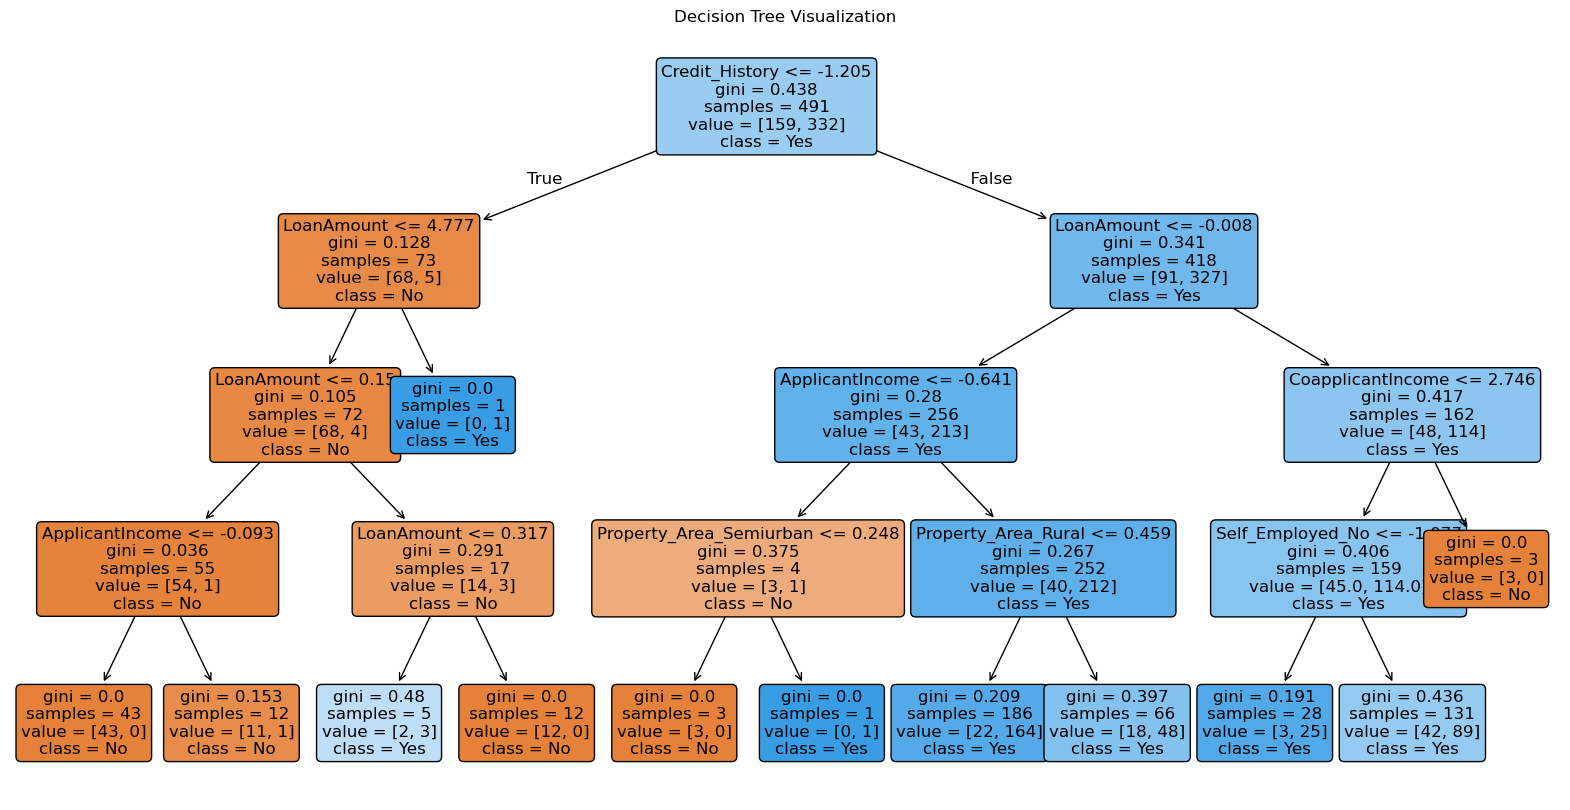

In [448]:
# plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt,
          feature_names=X.columns, 
          class_names=["No", "Yes"], 
          filled=True, 
          rounded=True,
          fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()

In [449]:
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

[[13 20]
 [ 5 85]]
              precision    recall  f1-score   support

           0       0.72      0.39      0.51        33
           1       0.81      0.94      0.87        90

    accuracy                           0.80       123
   macro avg       0.77      0.67      0.69       123
weighted avg       0.79      0.80      0.77       123



# Bagging Classifier

In [453]:
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators = 100,
    max_samples =0.8,
    bootstrap = True,
    random_state = 42
)

In [455]:
# Training on X_resample, y_resample
BC.fit(X_train,y_train)
y_pred_BC = BC.predict(X_test)

In [456]:
# Evaluate the model
confusion_matrix(y_test,y_pred_BC)

array([[15, 18],
       [10, 80]], dtype=int64)

In [459]:
print(classification_report(y_test,y_pred_BC))

              precision    recall  f1-score   support

           0       0.60      0.45      0.52        33
           1       0.82      0.89      0.85        90

    accuracy                           0.77       123
   macro avg       0.71      0.67      0.68       123
weighted avg       0.76      0.77      0.76       123



In [469]:
import warnings
warnings.filterwarnings('ignore')

In [471]:
## Appending all the model into list
Models = []
Models.append(('LR',LogisticRegression()))
Models.append(('svm',SVC()))
Models.append(('RF',RandomForestClassifier()))
Models.append(('knn',KNeighborsClassifier()))
# Models.append(('XGb',XGBClassifier()))
Models.append(('BC',BaggingClassifier()))
Models.append(('GBC',GradientBoostingClassifier()))

In [473]:
Models

[('LR', LogisticRegression()),
 ('svm', SVC()),
 ('RF', RandomForestClassifier()),
 ('knn', KNeighborsClassifier()),
 ('BC', BaggingClassifier()),
 ('GBC', GradientBoostingClassifier())]

In [475]:
from sklearn.model_selection import KFold,cross_val_score

In [477]:
results = []
names = []
score = 'accuracy'
for name, model in Models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model,X_resample,y_resample,cv=kfold,scoring=score)
    results.append(cv_result)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_result.mean(), cv_result.std())
    print(msg)

LR: 0.706218 (0.055417)
svm: 0.272367 (0.145379)
RF: 0.856905 (0.089933)
knn: 0.610196 (0.064382)
BC: 0.815546 (0.110768)
GBC: 0.843922 (0.085542)


In [242]:
X_resample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               844 non-null    object 
 1   ApplicantIncome          844 non-null    int64  
 2   CoapplicantIncome        844 non-null    float64
 3   LoanAmount               844 non-null    float64
 4   Loan_Amount_Term         844 non-null    float64
 5   Credit_History           844 non-null    float64
 6   Gender_Female            844 non-null    float64
 7   Gender_Male              844 non-null    float64
 8   Married_No               844 non-null    float64
 9   Married_Yes              844 non-null    float64
 10  Education_Graduate       844 non-null    float64
 11  Education_Not Graduate   844 non-null    float64
 12  Self_Employed_No         844 non-null    float64
 13  Self_Employed_Yes        844 non-null    float64
 14  Property_Area_Rural      8